## This is a JupiterNotebook which will illustrate data prediction using Linear Regression

In order to run the piece of code - please use the navigation bar above, or press $Shift$ + $↵Enter$

## Intro

At the moment I'm stydying how to predict correct outputs $y$ for given inputs $x$ applying supervised learining. 

In this notebook, I'll apply Linear Regression (Unvariative) algotythm to model, which is presented as $f_{w,b}(x) = wx +b$, where:
- $f_{w,b}(x)$ - the result of model evaluation
- $x$ - input value (target example feature value)
- $y$ - target output value of training example $x$
- $w, b$ - parameters used to improve the model accuracy

*unvariative algorithm - algorithm with one feature, which can be represented on the graph as a straight line.

## Problem Statement

Let's imagine, that we would like to create a model, which can predict housing prices given the size of the house.

At the beginning, we have a few data points wich we'll user as a basis for creating our model:


| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1                 | 300                      |
| 2                  | 500                      |

For calculation purposes, we'll specify this data as numpy arrays.
However, first of all, we'll need to instal libraries:

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([1.0, 2.0, 3.0, 7.5, 4.6])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0, 700.0, 1000.0, 780.0])       #(price in 1000s of dollars)

#also we need to specify m - number of training parameters. m = number of input values for our training set

m = len(x_train)

## Plotting Data

Let's display our training set examples, to see how points are distributed in 2D plot

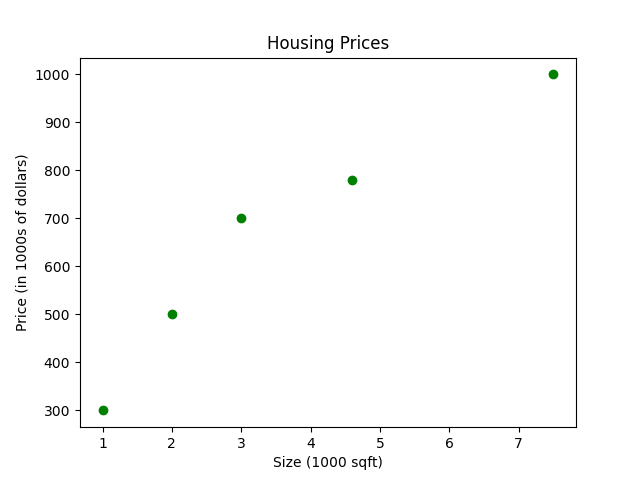

In [16]:
# Plot the data points
plt.scatter(x_train, y_train, marker='o', c='g')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

And what about our $w$ and $b$ values? They are used to built a straight line on our graph, which, in it's turn - will be used for predicting target output $y$ for any new value $x$ we fit into model. 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how we can represent straight lines - different values of $w$ and $b$ will give different straight lines on the plot. Let's try some random values and compute the model output for them:

In [17]:
w = 100
b = 100

def compute_model_output(x, w, b):
    m = len(x_train) #get the number of values in our training set
    f_wb = np.zeros(m) #create one-dimensional numpy array with  𝑛  entries
    for i in range(m):
        f_wb[i] = w * x[i] + b #our function for this model
        
    return f_wb

Now let's call the `compute_model_output` function and plot the output..

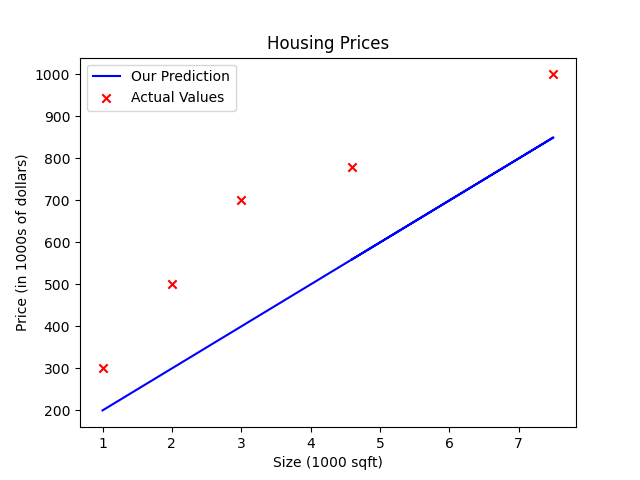

In [18]:
output_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, output_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

Depending on values of $w$ and $b$ you've set - you can see the line plotted newar or far from our actual values.
You can try changing the values manually, to see if you can achieve the better location. 

However, is there a way to calculate, how good our selected $w$ and $b$ values are? For sure - here is where our Cost function comes into play!

## COST FUNCTION (Squared error cost function)

Cost is a function, used to measure how well our model is predicting the target output $y$. The lower cost is - the better our model is predicting output values.

*We will use (x$^{(i)}$, y$^{(i)}$) to denote the $i^{th}$ training example. Please note that Python is zero indexed*

The equation for cost with one variable (as in our unveriative linear regression) is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  

In [19]:
def compute_cost(x, y, w, b): 
    m = x.shape[0] 
    
    cost_sum = 0
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost


In [20]:
print("Our current cost is:", compute_cost(x_train, y_train, w, b))

Our current cost is: 21090.0


In [21]:
def print_linear_regression(x_plot, y_plot, w, b):
    m = len(x_train)

    new = np.zeros(m) 
    for i in range(m):
        new[i] = w * x_plot[i] + b #get predicted y values to compare with real ones

    output_f_wb = compute_model_output(x_plot, w, b)

    # Plot our model prediction
    plt.plot(x_plot, output_f_wb, c='b',label='Our Prediction')

    # Plot real data points

    plt.scatter(x_plot, y_plot, marker='x', c='r',label='Actual Values')

    # Plot predicted data points
    plt.scatter(x_plot, new, marker='o', c='r',label='Predicted')

    # Plot distance between predicted and real values - model "error"

    point1 = [x_plot, y_plot]
    point2 = [x_plot, new]

    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]

    plt.plot(x_values, y_values, c='r', linestyle='dashed')

    # Set the title
    plt.title("Housing Prices")
    # Set the y-axis label
    plt.ylabel('Price (in 1000s of dollars)')
    # Set the x-axis label
    plt.xlabel('Size (1000 sqft)')
    plt.legend()
    plt.show()



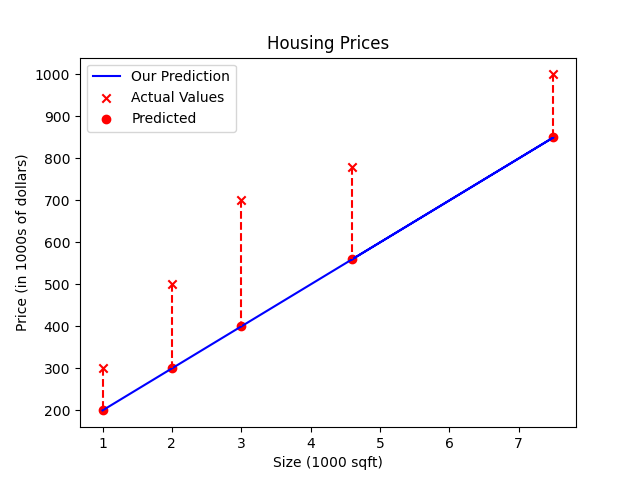

In [22]:
print_linear_regression(x_train, y_train, w, b)

Perhaps, you were lucky and from the wery beggining guessed the optimal $w$ and $b$ values for this model and got the Cost near to 0, or even equal to 0 *(it's not always possible to get 0 cost error - ideal prediction - but we need to do our best to minimize the cost as much as possible)*.

However, in real life, especially when working with huge models - we don't have the ability to just sit and guess from all possible values

But, luckily, we have a Gradient Descent, which can help us to automate the variables section process. 

## GRADIENT DESCENT ALGORITHM

Gradient dascent - automatically updates all the given parameters simultaneously, untill the cost function convergence is found.

In general - Gradient Descent can stuck into local minimum, and stop iterating variables before the best value found. However, as in this particular case we are working with convex function - no local minimums are present, and we will be searching for Global Minimum only.

The gradient is defined as following:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

And in order to get $w$ and $b$ values, it can be simplified to:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  

The naming of python variables containing partial derivatives follows this pattern: $\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.

We'll starts with computing gradient for linear regression, to return partial derivatives $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$, so we can use those values for calculating $w$ and $b$.

In [23]:
def compute_gradient(x, y, w, b): 

    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

Result received for each of the iterations - allow our gradient to understand to which side make a next iteration step, in order to become a bit closer to the Global Minimum.

As soon as derivatives are calculated, we can run our algorithm to get best $w$ and $b$ values using formulas above:

In [24]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

    return w, b

As you might noticed, our gradient descent function takes several parameters as input. 

'w_in' and 'b_in' - are the values randomly chosen for first iteration of calculation, as we need to start from somewhere:)
Do not worry, we'll still get the correct result at the end - as, as mentioned above - no local minimums for Convex functions, global minimum only!

Also, there is interesting story about choosing $\alpha$ value - but we'll talk about it in next Notebooks. 

The main things you need to know for now - are the following:
- if $\alpha$ is too small - you will move to Global Minimum very slowly. But still, you-ve reach it
- if $\alpha$ is too large - gradient descent may fail to converge, and even diverge after overshooting minimum (so be careful with it)
- if $\alpha$ is choosed that way, that gradient is already at the minimum point - variables would stay unchanged

In [25]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

print(w_final, b_final)

100.98887515458638 290.4202719402963


Now let's plot the same graphic, but using our new computed $w$ and $b$ values, and see if we've improved result!

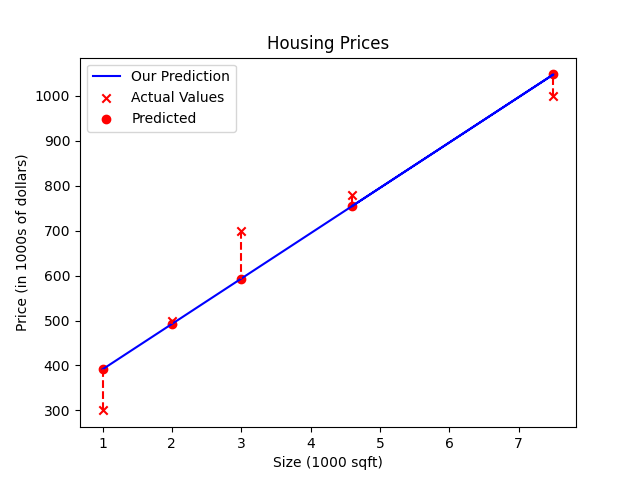

In [26]:
print_linear_regression(x_train, y_train, w_final, b_final)

And the main thing, why we were doing all of the above - to use our model to predict new ourput values for each of our new input values!

Just set a new value of `input_x` and get the deserved predicted `output_y`!

In [27]:
input_x = 2.5

output_y = w_final * input_x + b_final    

print(f"Your prediction is y = {output_y:.0f}!")

Your prediction is y = 543!


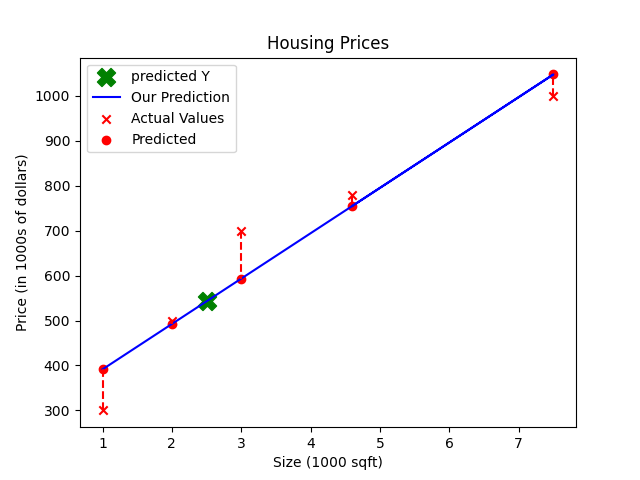

In [28]:
plt.scatter(input_x, output_y, marker='X', c='g', s=13**2, label='predicted Y')
print_linear_regression(x_train, y_train, w_final, b_final)